In [1]:
import os
import tensorflow as tf
import pandas as pd                     
import numpy as np
import cv2
import PIL.Image as Image
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import datetime
import seaborn as sns
import pandas as pd                     
from IPython import display
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:

train_dir = r"S:\fusion"
#validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMAGE_SHAPE = (224, 224)


In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMAGE_SHAPE)

Found 11109 files belonging to 27 classes.


In [4]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
val_batches1 = tf.data.experimental.cardinality(train_dataset)
validation_dataset = train_dataset.take(val_batches1 // 5)
train_dataset = train_dataset.skip(val_batches1 // 5)

In [6]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(validation_dataset))

Number of validation batches: 279
Number of test batches: 69


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)


In [8]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [9]:
num_of_classes = 27

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 27)                34587     
                                                                 
Total params: 2,292,571
Trainable params: 34,587
Non-trainable params: 2,257,984
_________________________________________________________________


In [10]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])



In [11]:
history = model.fit(train_dataset,
                    epochs=3,
                    validation_data=validation_dataset)

Epoch 1/3
279/279 [==============================] - 244s 791ms/step - loss: 1.6299 - acc: 0.5599 - val_loss: 1.0170 - val_acc: 0.7505
Epoch 2/3
279/279 [==============================] - 250s 811ms/step - loss: 0.7948 - acc: 0.8170 - val_loss: 0.6798 - val_acc: 0.8347
Epoch 3/3
279/279 [==============================] - 218s 714ms/step - loss: 0.5455 - acc: 0.8808 - val_loss: 0.5102 - val_acc: 0.8827


In [ ]:
prediccionTest =  np.argmax(model.predict(validation_dataset),  axis=1)

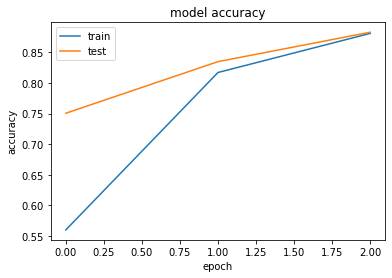

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

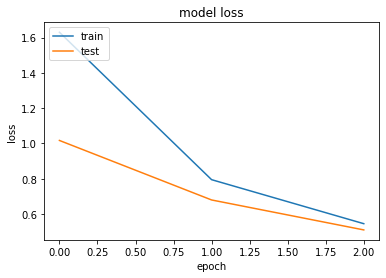

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()